# Smoke and Fire Detection

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augumentation

In [19]:
batch_size=16

training_datagenarator= ImageDataGenerator(rescale=1./255,
                                           horizontal_flip=True,
                                           vertical_flip=True,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           validation_split=0.1)

# Dividing the data into training and validation

In [20]:
train=training_datagenarator.flow_from_directory('C:/Users/Manoj M/Downloads/Data science/Deep learning/Practice data/Smoke and Fire Detection/Trainning Data',
                                                target_size=(224, 224),color_mode='rgb',
                                                class_mode='binary', 
                                                batch_size=batch_size,
                                                 seed=123,
                                                subset='training')



Found 12359 images belonging to 2 classes.


In [21]:
validation=training_datagenarator.flow_from_directory('C:/Users/Manoj M/Downloads/Data science/Deep learning/Practice data/Smoke and Fire Detection/Trainning Data',
                                                target_size=(224, 224),color_mode='rgb',
                                                class_mode='binary', 
                                                batch_size=batch_size,
                                                       seed=123,
                                                subset='validation')

Found 1373 images belonging to 2 classes.


# Creating CNN Model 

In [22]:
from tensorflow.keras import models, layers
# Initializing model
model=models.Sequential()

In [23]:
# adding layers
model.add(layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
model.add(layers.MaxPool2D(pool_size=2))

model.add(layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(layers.MaxPool2D(pool_size=2))

model.add(layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(layers.MaxPool2D(pool_size=2))

model.add(layers.Flatten())
model.add(layers.Dense(units=128,activation='relu'))
model.add(layers.Dense(units=1,activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 256)       147712    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 256)     

# Compile and Train The Model 

In [25]:
#Saves the best model
checkpoint=tf.keras.callbacks.ModelCheckpoint('C:/Users/Manoj M/Downloads/Data science/Deep learning/Practice data/Smoke and Fire Detection/Models/model.h5',
                                             monitor='val_loss',mode="min",
                                             save_best_only=True)
callbacks=[checkpoint]

In [26]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(train,
        validation_data=validation,
                    epochs=10,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size,
                  callbacks=callbacks 
                 )

772/772 [==============================] - 853s 1s/step - loss: 0.0730 - accuracy: 0.9827 - val_loss: 0.0085 - val_accuracy: 0.9985


# Test 

In [27]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [47]:
image_for_testing="C:/Users/Manoj M/Downloads/Data science/Deep learning/Practice data/Smoke and Fire Detection/Trainning Data/Fire/wildfire.jpg"

In [48]:
test_image=image.load_img(image_for_testing,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)

if int(result[0][0])==0:
    print("Fire")
else:
    print("Smoke")

Fire


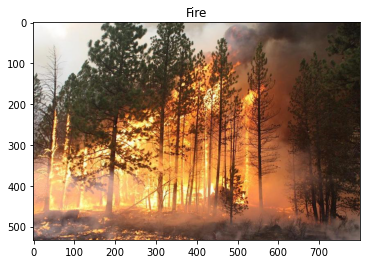

In [49]:
Catagories=['Fire','Smoke']

image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(Catagories[int(result[0][0])])
plt.show()